<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Montserrat:ital,wght@0,100..900;1,100..900&family=Roboto:ital,wght@0,100..900;1,100..900&display=swap" rel="stylesheet">

<style>
    :root {
        --text-color: rgb(206,206,206);
        --background-color: #141414;
    }

    @media (prefers-color-scheme: light) {
        :root {
            --text-color: #333;
            --background-color: #fff;
        }
    }

    /* font deets */
    .banner {
        color: var(--text-color);
        background-color: var(--background-color);
        padding: 0px;
        text-align: center;
        border-radius: 15px;
        font-family: 'Montserrat', sans-serif;
    }
    .banner h1 {
        font-weight: 900;
        margin-top: 0;
        margin-bottom: 5px;
        font-size: 40px;
    }
    .banner p {
        font-weight: 400;
        margin-top: 0px;
        margin-bottom: 10px;
        font-size: 20px;
        padding: 0px;
    }
</style>

<div class="banner">
    <h1> G3.IS196: Tours and Traveling—Customer Churning </h1>
    <p> An exploration by <em> data science </em> students </p>
    <p> from <strong> Group 3 </strong> in compliance with the 
    requirements </p>
    <p> of IS196[L]; Business Intelligence from Mapua University </p>
</div>

<style>
    .text-box {
        color: var(--text-color);
        background-color: var(--background-color);
        border: 0px solid #141414;
        border-radius: 10px;
        padding: 20px; 
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        font-family: 'Roboto', sans-serif;
        font-size: 16px;
        line-height: 1.5;
        max-width: 800px;
        margin: 20px auto;
        text-align: justify;
    }
</style>

<div class="text-box">
    <p>By connecting people to a variety of places, cultures, and experiences, the tour and travel sector makes a substantial contribution to world economies.  It covers things like hotel, travel assistance, vacation packages, and transportation.  It provides individualized experiences that improve convenience and general satisfaction for both business and leisure tourists.</p>
    <p> Travelers today have easy access to booking services, online reviews, and customized travel advice due to technological advancements and online resources.  Nonetheless, companies in the sector face difficulties including keeping clients, controlling varying demand, and adjusting to shifting traveler tastes.  Improving services, increasing customer happiness, and preserving long-term profitability all depend on understanding consumer behavior, especially the elements that lead to customer churn. </p>
    <p> Businesses may identify the main causes of customer disengagement and put loyalty-boosting tactics into place by looking at the loss of clients in the tour and travel sector.  Businesses may make well-informed decisions to improve their services and maintain their competitiveness in the ever-changing travel industry by leveraging data analytics and machine learning. </p>
    <p> This notebook presents an analysis of customer churn in the tour and travel industry, examining key factors affecting customer retention, including age, frequent flyer status, income class, selected services, social media account synchronization, and hotel bookings. By applying data cleaning, exploratory data analysis (EDA), and machine learning models, we aim to uncover patterns and predict churn. Through visualizations and statistical insights, this analysis provides a deeper understanding of customer behavior, helping businesses refine retention strategies and improve customer satisfaction. </p>
</div>

# <strong> <center> Phase 1: Library Installs and Imports </center> <strong>
***

In [220]:
# I referred to 'SRC_PPR_Customer-Churn.ipynb'for expansion.

'''
%pip install kagglehub

Note: on 'df_path'
    The path must be edited to only have one backslash because
    Python uses backslash as an escape character.
    Once kaggle cache is set up, file can be copied in the code directory.
'''

import kagglehub as kh
from kagglehub import KaggleDatasetAdapter

df_path = kh.dataset_download("tejashvi14/tour-travels-customer-churn-prediction")
df_path #prints the double-slash path where the loaded dataset is stored

'C:\\Users\\reyes\\.cache\\kagglehub\\datasets\\tejashvi14\\tour-travels-customer-churn-prediction\\versions\\2'

In [141]:
'''
Non-typical library(-ies) used: [i.e., must be installed to follow]
%pip install missingno
%pip install plotly
'''

# Basic library list
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [142]:
''' 
Machine Learning libraries used: (Basically the list of MLs we can try to use for the CCHRN.)

%pip install scikit-learn
%pip install xgboost
%pip install catboost
'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [233]:
#Additional libraries

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report 

# <strong> <center> Phase 2: Preprocessing & Set-ups </center> <strong>
***

In [ ]:
''' 
Columns involve:
- Age (age of customer in years)
- FrequentFlyer (if customer is enrolled in freq. flyer program (Yes/No))
- AnnualIncomeClass (income class of customer)
- ServicesOpted (# of travel-related services opted by customer)
- AccountSynedToSocialMedia (if customer account is synced to social media (Yes/No))
- BookedHotelOrNot (if customer booked a hotel (Yes/No))

- Target (binary; if customer churned or not (1(-) - left; 0 (+) - stayed))
'''

df = pd.read_csv('Customertravel.csv')
df.head(5)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [34]:
''' 
Compiled all the basic data-checking functions in one cell for easy access and less cell clutter.
Removed the graph displaying missing values due to redundancy; given that all are collectively 0.
'''

missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values.to_string(index=True))

print("\n--------------------------------------------------------")
print("\nShape (rows, columns):", df.shape)
print("\n--------------------------------------------------------")
print("\nColumns:", df.columns.values) # for easy copy-paste of CNs
print("\n--------------------------------------------------------")
df.info() #overall df check (non-null count, dtype, etc.)
print("\n--------------------------------------------------------")
print("\nDescriptive Statistics of the dataset:\n", df.describe())

Missing values:
Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0

--------------------------------------------------------

Shape (rows, columns): (954, 7)

--------------------------------------------------------

Columns: ['Age' 'FrequentFlyer' 'AnnualIncomeClass' 'ServicesOpted'
 'AccountSyncedToSocialMedia' 'BookedHotelOrNot' 'Target']

--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-

In [35]:
'''
binary_cols: defines all columns in 'df' that have binary values (Yes/No) and assigns them to 0/1
            - through value mapping.
label_encoder: uses sklearn.preprocessing module to convert 'AnnualIncomeClass' to numerical values.
fit_transform: fits the (label) encoder to the unique values in the column and transforms column into its encoded form.

X: contains all cols. exceept 'Target,' the column to be predicted.
Y: contains only 'Target'.
'''

binary_cols = ['FrequentFlyer', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']
df['FrequentFlyer'] = df['FrequentFlyer'].map({'Yes': 1, 'No': 0, 'No Record': -1})  # Assigning -1 for "No Record"
df['AccountSyncedToSocialMedia'] = df['AccountSyncedToSocialMedia'].map({'Yes': 1, 'No': 0})
df['BookedHotelOrNot'] = df['BookedHotelOrNot'].map({'Yes': 1, 'No': 0}) 

label_encoder = LabelEncoder()
df['AnnualIncomeClass'] = label_encoder.fit_transform(df['AnnualIncomeClass'])

X = df.drop(columns=['Target'])
Y = df['Target']

# <strong> <center> Phase 3: Exploratory Data Analysis </center> <strong>
***

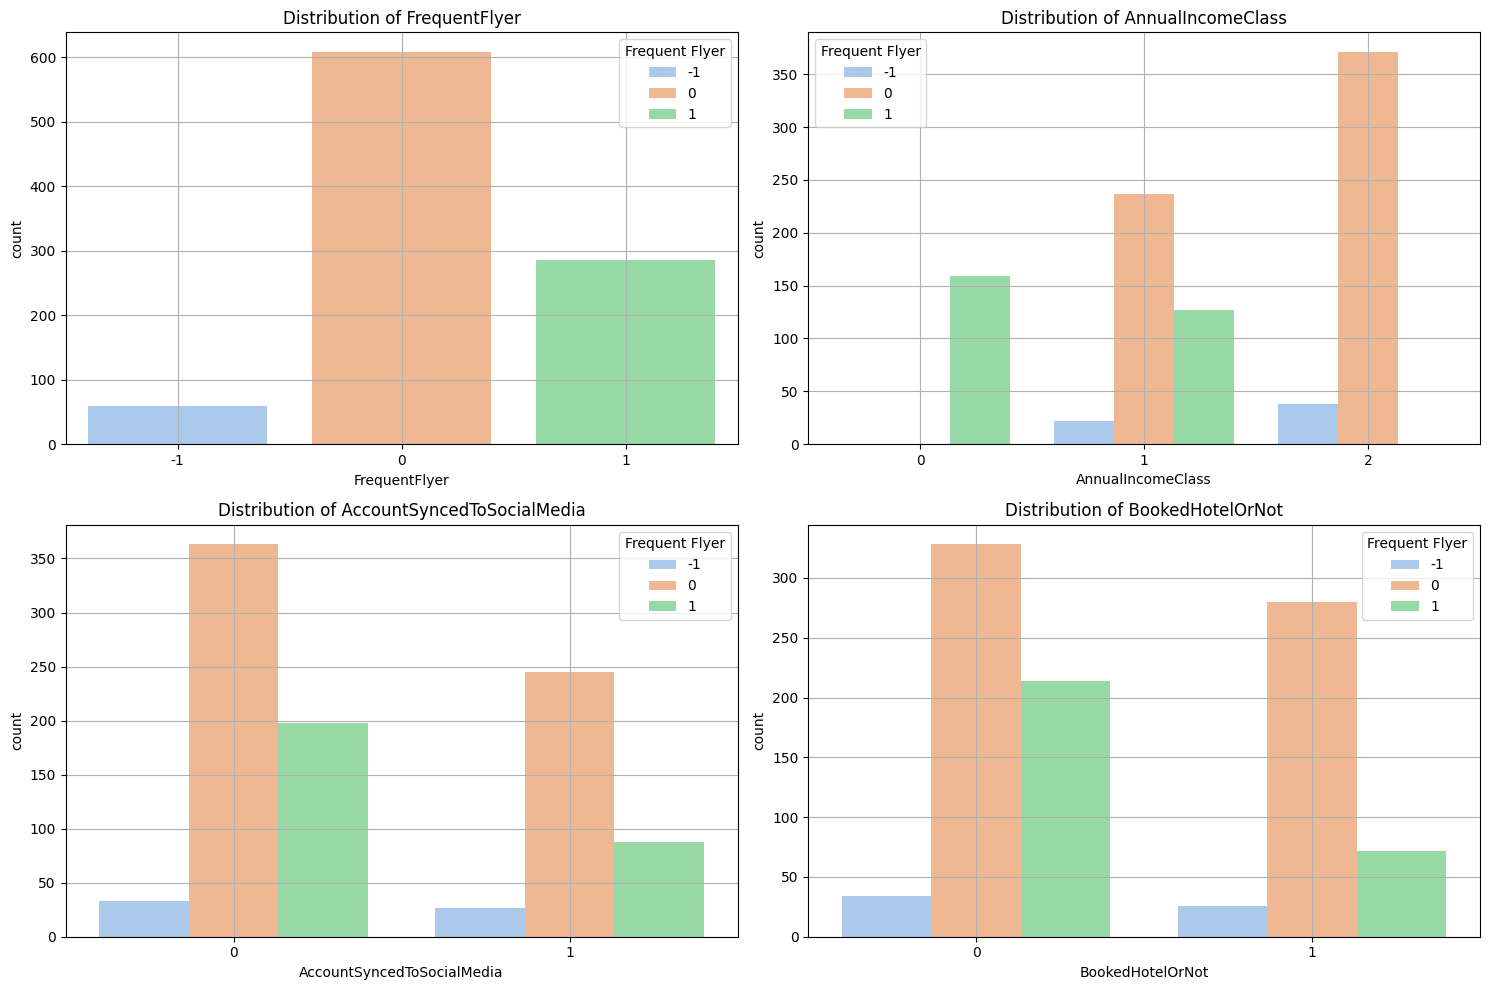

In [258]:
''' 
To suppress the warning, I set the hue parameter to 'FrequentFlyer' in the countplot function.
This is to show the distribution of the columns with respect to the 'FrequentFlyer' column.

ex: 
In AnnualIncomeClass, how many low-middle-high class customers are enrolled in the frequent flyer program?

Addtl.
    - Created subplot to avoid waste of space. (Calculation through n_cols and n_rows)
    - for loop in [i] for categorical_cols to avoid hardcoding.
    - for loop in [j] to remove empty subplots (standard for future cell use).
        - 'delaxes' function specifically.
'''

categorical_cols = ['FrequentFlyer', 'AnnualIncomeClass', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']
n_cols = 2 
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], hue=df['FrequentFlyer'], palette='pastel', ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].legend(title='Frequent Flyer')
    axs[i].grid(True)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

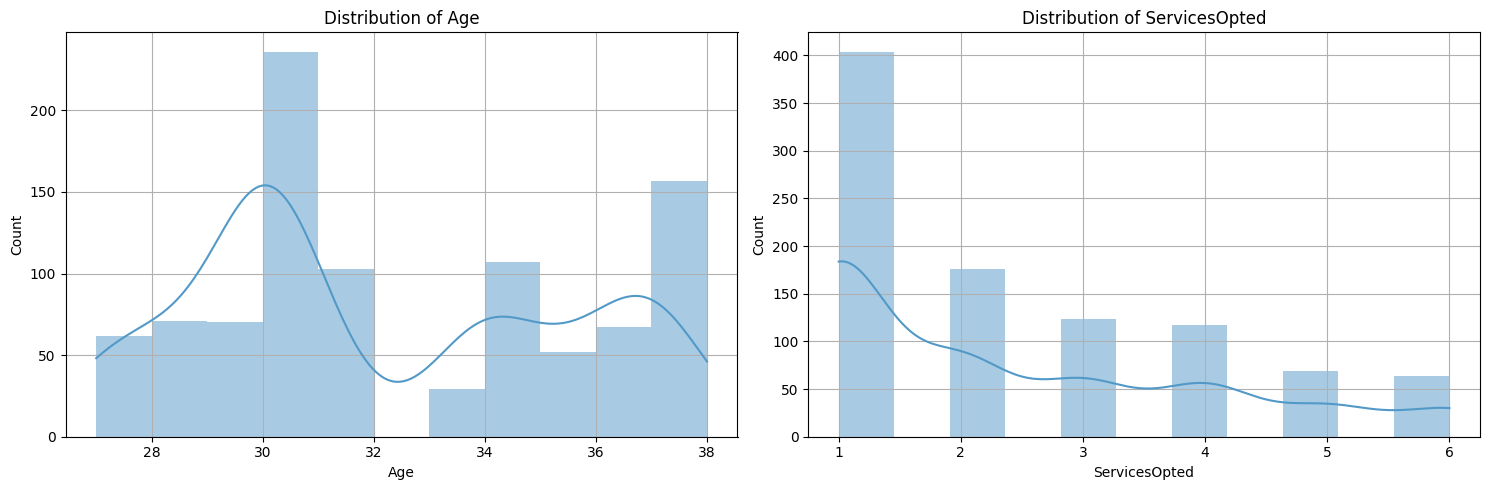

In [257]:
''' 
Same logic as above:
    - This creates and displays histograms for *numerical* columns in the 'df'.
    - `enumerate()`: Provides index and column name for each numerical column.
    - uses `sns.histplot()` to create the histogram.
'''

numerical_cols = ['Age', 'ServicesOpted']
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
colors = '#5299c8'

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axs[i], kde=True, color=colors, edgecolor='none')
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

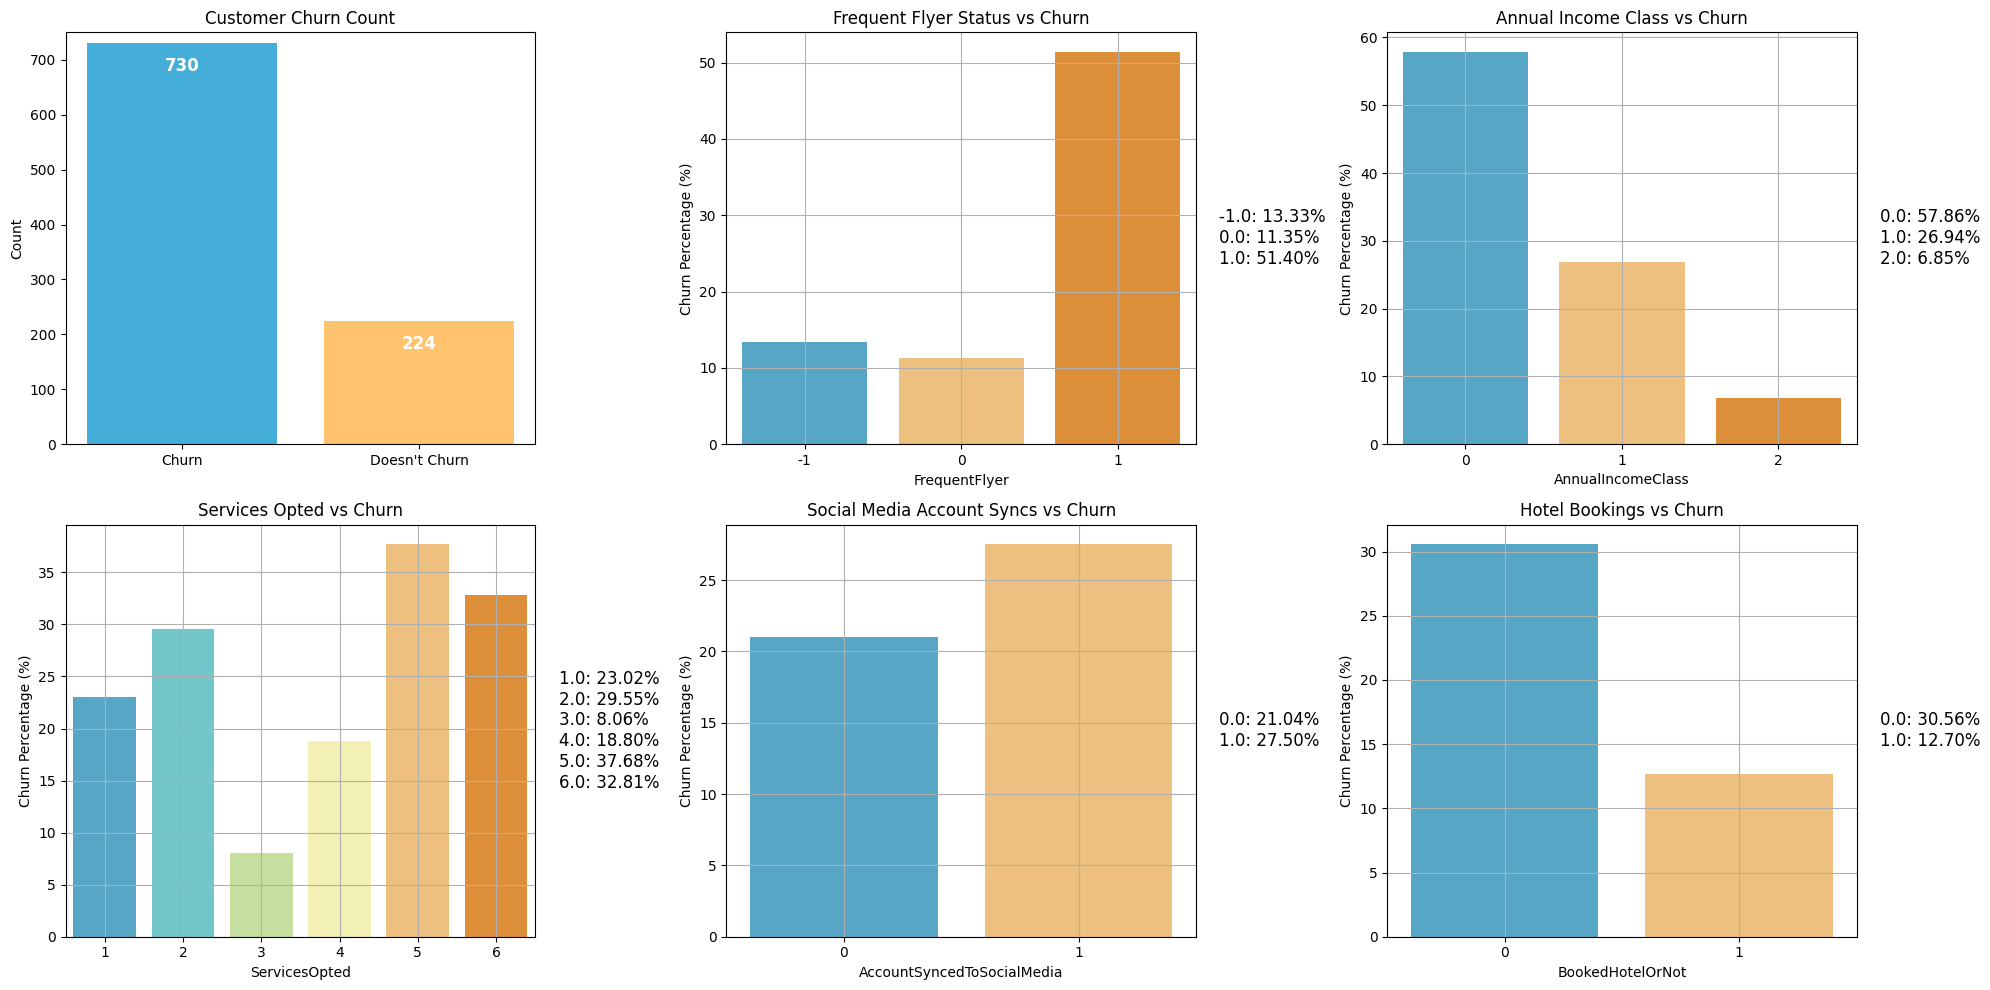

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

#------------------- SP1: Churn count
''' 
This code block creates a bar chart to visualize customer churn count.

Steps:
1. Count the occurrences of each target value (Churn vs. Doesn't Churn).
2. Define labels and colors for the bar chart.
3. Plot the bar chart with the given labels and colors.
4. Set the y-axis label, chart title, and y-axis limit.
5. Annotate each bar with the count value.
'''

churn_counts = df['Target'].value_counts()
labels = ['Churn', 'Doesn\'t Churn']
colors1 = ['#44AED9', '#FFC36D']

axs[0, 0].bar(labels, churn_counts, color=colors1, edgecolor='none')
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_title("Customer Churn Count")
axs[0, 0].set_ylim(0, max(churn_counts) + 20)

for i, count in enumerate(churn_counts):
    axs[0,0].text(i, count - 50, str(count), ha='center', fontsize=12, fontweight='bold', color='white')

#------------------- SP2: Churn percentage by frequent flyer status

''' 
This code block creates a bar chart to visualize the churn percentage based on frequent flyer status.

Steps:
1. Define colors for the bar chart.
2. Calculate the mean churn percentage for each frequent flyer status.
3. Plot the bar chart with the specified colors, labels, and layout.
4. Set the y-axis label, chart title, and x-axis ticks and labels.
5. Add grid lines and remove the legend.
6. Annotate the chart with the churn percentage values for each frequent flyer status. 
    - this is the print(churnn_by_frequent_flyer) part
    - converted to percentage.

This docstring can be used as reference for future code blocks in this cell.

++ Remember, from Phase 2 (PPR), FreqFlying was mapped with -1 for 'No Record'.
'''

colors2 = ['#44AED9', '#FFC36D', '#F98F1C']
churn_by_frequent_flyer = (df.groupby('FrequentFlyer')['Target'].mean() * 100).reset_index()

sns.barplot(x='FrequentFlyer', y='Target', data=churn_by_frequent_flyer, ax=axs[0,1], palette=colors2, hue='FrequentFlyer', dodge=False)

axs[0,1].set_ylabel("Churn Percentage (%)")
axs[0,1].set_title("Frequent Flyer Status vs Churn")

axs[0,1].set_xticks(range(len(churn_by_frequent_flyer['FrequentFlyer'])))
axs[0,1].set_xticklabels(churn_by_frequent_flyer['FrequentFlyer'], rotation=0)

axs[0,1].grid(True)
axs[0,1].legend_.remove()

result_text1 = "\n".join([f"{row['FrequentFlyer']}: {row['Target']:.2f}%" for index, row in churn_by_frequent_flyer.iterrows()])
axs[0,1].text(1.05, 0.5, result_text1, transform=axs[0,1].transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

#------------------- SP3: Churn percentage by annual income class

colors3 = ['#44AED9', '#FFC36D', '#F98F1C']
churn_by_income = (df.groupby('AnnualIncomeClass')['Target'].mean() * 100).reset_index()

sns.barplot(x='AnnualIncomeClass', y='Target', data=churn_by_income, ax=axs[0,2], palette=colors3, hue='AnnualIncomeClass', dodge=False)

axs[0,2].set_ylabel("Churn Percentage (%)")
axs[0,2].set_title("Annual Income Class vs Churn")

axs[0,2].set_xticks(range(len(churn_by_income['AnnualIncomeClass'])))
axs[0,2].set_xticklabels(churn_by_income['AnnualIncomeClass'], rotation=0)

axs[0,2].grid(True)
axs[0,2].legend_.remove()

result_text2 = "\n".join([f"{row['AnnualIncomeClass']}: {row['Target']:.2f}%" for index, row in churn_by_income.iterrows()])
axs[0,2].text(1.05, 0.5, result_text2, transform=axs[0,2].transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

#------------------- SP4: Churn percentage by services opted

colors4 = ['#44AED9', '#65D5D8','#C9E994','#FCF9AB', '#FFC36D','#F98F1C']
churn_by_servopt = (df.groupby('ServicesOpted')['Target'].mean() * 100).reset_index()

sns.barplot(x='ServicesOpted', y='Target', data=churn_by_servopt, ax=axs[1,0], palette=colors4, hue='ServicesOpted', dodge=False)

axs[1,0].set_ylabel("Churn Percentage (%)")
axs[1,0].set_title("Services Opted vs Churn")

axs[1,0].set_xticks(range(len(churn_by_servopt['ServicesOpted'])))
axs[1,0].set_xticklabels(churn_by_servopt['ServicesOpted'], rotation=0)

axs[1,0].grid(True)
axs[1,0].legend_.remove()

result_text3 = "\n".join([f"{row['ServicesOpted']}: {row['Target']:.2f}%" for index, row in churn_by_servopt.iterrows()])
axs[1,0].text(1.05, 0.5, result_text3, transform=axs[1,0].transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

#------------------- SP5: Churn percentage by social media account syncs

colors5 = ['#44AED9', '#FFC36D']
churn_by_socmed = (df.groupby('AccountSyncedToSocialMedia')['Target'].mean() * 100).reset_index()

sns.barplot(x='AccountSyncedToSocialMedia', y='Target', data=churn_by_socmed, ax=axs[1,1], palette=colors5, hue='AccountSyncedToSocialMedia', dodge=False)

axs[1,1].set_ylabel("Churn Percentage (%)")
axs[1,1].set_title("Social Media Account Syncs vs Churn")

axs[1,1].set_xticks(range(len(churn_by_socmed['AccountSyncedToSocialMedia'])))
axs[1,1].set_xticklabels(churn_by_socmed['AccountSyncedToSocialMedia'], rotation=0)

axs[1,1].grid(True)
axs[1,1].legend_.remove()

result_text4 = "\n".join([f"{row['AccountSyncedToSocialMedia']}: {row['Target']:.2f}%" for index, row in churn_by_socmed.iterrows()])
axs[1,1].text(1.05, 0.5, result_text4, transform=axs[1, 1].transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

#------------------- SP6: Churn percentage by hotel bookings

colors6 = ['#44AED9', '#FFC36D']
churn_by_hotelbooks = (df.groupby('BookedHotelOrNot')['Target'].mean() * 100).reset_index()

sns.barplot(x='BookedHotelOrNot', y='Target', data=churn_by_hotelbooks, ax=axs[1, 2], palette=colors6, hue='BookedHotelOrNot', dodge=False)

axs[1,2].set_ylabel("Churn Percentage (%)")
axs[1,2].set_title("Hotel Bookings vs Churn")

axs[1,2].set_xticks(range(len(churn_by_hotelbooks['BookedHotelOrNot'])))
axs[1,2].set_xticklabels(churn_by_hotelbooks['BookedHotelOrNot'], rotation=0)

axs[1,2].legend_.remove()
axs[1,2].grid(True)

result_text5 = "\n".join([f"{row['BookedHotelOrNot']}: {row['Target']:.2f}%" for index, row in churn_by_hotelbooks.iterrows()])
axs[1, 2].text(1.05, 0.5, result_text5, transform=axs[1, 2].transAxes, fontsize=12, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

#-------------------------------------------------------------- 

plt.tight_layout()
plt.show()

# <strong> <center> Phase 4: Machine Learning Modeling </center> <strong>
***

In [156]:
''' 
See in 'Phase 2' for definition of X & Y; fast track via Outline.

results: dictionary to store model name and accuracy score.
scaler: StandardScaler() to normalize numerical columns.
fit_transform: fits and transforms the training data.
transform: applies the transformation to the test data.
'''

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40, stratify = Y)
results = {
    "Model": [],
    "Accuracy": []
}

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
''' 
This code trains and evaluates multiple machine learning models on the training data and appends the accuracy results for each model to the 'results' dictionary.

Models included:
- Logistic Regression
- Random Forest
- XGBoost
- Support Vector Classification (SVC)
- k-Nearest Neighbors (k-NN)
- Neural Network (MLPClassifier)
- CatBoost
- AdaBoost  
- Decision Tree
- Extra Trees

Steps:
1. Initialize and train each model using the training data (X_train, Y_train).
2. Predict the target values using the test data (X_test).
3. Calculate the accuracy for each model and append the model name and accuracy score to the 'results' dictionary.
'''

# Logistic Regression ------------------------------------------

log_reg = LogisticRegression()  
log_reg.fit(X_train, Y_train)  
Y_pred_log_reg = log_reg.predict(X_test)  

results["Model"].append("Logistic Regression")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_log_reg))

# Random Forest ------------------------------------------------

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)

results["Model"].append("Random Forest")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_rf))

# XGB ----------------------------------------------------------

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)
Y_pred_xgb = xgb_model.predict(X_test)

results["Model"].append("XGBoost")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_xgb))

# Support Vector Classification --------------------------------

svc_model = SVC(probability=True, random_state=42)
svc_model.fit(X_train, Y_train)
Y_pred_svm = svc_model.predict(X_test)

results["Model"].append("SVC")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_svm))

# KNN ----------------------------------------------------------

knn_model= KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

results["Model"].append("k-NN")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_knn))

# Neutral Network ----------------------------------------------

mlp_model = MLPClassifier(random_state=42, max_iter=5000)
mlp_model.fit(X_train, Y_train)
Y_pred_mlp = mlp_model.predict(X_test)

results["Model"].append("Neural Network")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_mlp))

# CatBoost -----------------------------------------------------

catboost_model = CatBoostClassifier(random_state=42, iterations=100, learning_rate=0.1, depth=6, verbose=False)
catboost_model.fit(X_train, Y_train)
Y_pred_catboost = catboost_model.predict(X_test)

results["Model"].append("CatBoost")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_catboost))

# AdaBoost -----------------------------------------------------

ada_model = AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
ada_model.fit(X_train, Y_train)
Y_pred_ada = ada_model.predict(X_test)

results["Model"].append("AdaBoost")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_ada))

# Decision Tree ------------------------------------------------

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, Y_train)
Y_pred_tree = dt_model.predict(X_test)

results["Model"].append("Decision Tree")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_tree))

# Extra Trees Classifier ---------------------------------------

extra_trees_model = ExtraTreesClassifier(random_state=42, n_estimators=100, max_depth=5)
extra_trees_model.fit(X_train, Y_train)
Y_pred_extra_trees = extra_trees_model.predict(X_test)

results["Model"].append("Extra Trees")
results["Accuracy"].append(accuracy_score(Y_test, Y_pred_extra_trees))

In [168]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results_df['Accuracy_Percent'] = (results_df['Accuracy'] * 100).round(2)
results_df

,Model,Accuracy,Accuracy_Percent
0,CatBoost,0.881533,88.15
1,k-NN,0.874564,87.46
2,Random Forest,0.867596,86.76
3,XGBoost,0.857143,85.71
4,Neural Network,0.853659,85.37
5,SVC,0.829268,82.93
6,AdaBoost,0.825784,82.58
7,Extra Trees,0.822300,82.23
8,Decision Tree,0.808362,80.84
9,Logistic Regression,0.804878,80.49


***

<style>
    h2 {
        margin-bottom: 10px;
    }
</style>

## <center><strong><em> XGBoost </em></strong></center>

<style>
    .text-box {
        color: var(--text-color);
        background-color: var(--background-color);
        border: 0px solid #141414;
        border-radius: 10px;
        padding: 5px; 
        box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        font-family: 'Roboto', sans-serif;
        font-size: 16px;
        line-height: 1.5;
        max-width: 800px;
        margin: 5px auto;
        text-align: justify;
    }
</style>

<div class="text-box">
    <p><strong>XGBoost</strong> is effective for predicting customer churn due to its ability to handle large datasets and complex relationships through gradient boosting. Its high accuracy, such as 85.71%, can be attributed to its robust feature selection, regularization techniques, and efficient handling of missing values, making it a powerful tool for churn prediction. <strong> Advantages of Using XGBoost for Customer Churn Prediction </strong> include:</p>
    <ul>
    <li><strong>High Accuracy:</strong> Achieving an accuracy of <strong>85.71%</strong> indicates that XGBoost effectively captures the patterns in the data, making it a reliable choice for predicting customer churn.</li>
    <li><strong>Robustness:</strong> XGBoost is designed to handle various types of data, including imbalanced datasets, which is common in churn prediction scenarios. This robustness helps in accurately identifying churners.</li>
    <li><strong>Feature Importance:</strong> The algorithm provides insights into feature importance, allowing businesses to understand which factors contribute most to customer churn. This can inform targeted retention strategies.</li>
    <li><strong>Speed and Efficiency:</strong> XGBoost is optimized for performance, enabling faster training times compared to other algorithms. This efficiency is crucial when working with large datasets typical in the telecommunications industry.</li>
    <li><strong>Flexibility:</strong> It supports various objective functions and evaluation metrics, making it adaptable to different business needs and allowing for fine-tuning based on specific churn characteristics.</li>
    <li><strong>Regularization:</strong> The built-in regularization techniques help prevent overfitting, ensuring that the model generalizes well to unseen data, which is essential for maintaining accuracy in real-world applications.</li>
    </ul>
</div>

In [188]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
Y_pred_proba_xgb = xgb_model.predict_proba(X_test)
positive_class_probabilities = Y_pred_proba_xgb[:, 0]

In [208]:
xg_df = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': Y_pred_xgb,
    'Positive Class Probability': positive_class_probabilities
})

xg_df['Positive Class Prob-Percent'] = (xg_df['Positive Class Probability'] * 100).round(2)

In [217]:
#xg_df = xg_df.set_index('Actual')
#xg_df = xg_df.reset_index()
xg_df

,Actual,Predicted,Positive Class Probability,Positive Class Prob-Percent
0,0,0,0.996744,99.669998
1,0,0,0.763702,76.370003
2,1,1,0.002602,0.260000
3,0,0,0.997849,99.779999
4,0,0,0.950707,95.070000
...,...,...,...,...
282,0,0,0.999646,99.959999
283,0,0,0.999896,99.989998
284,0,0,0.994665,99.470001
285,0,0,0.999899,99.989998


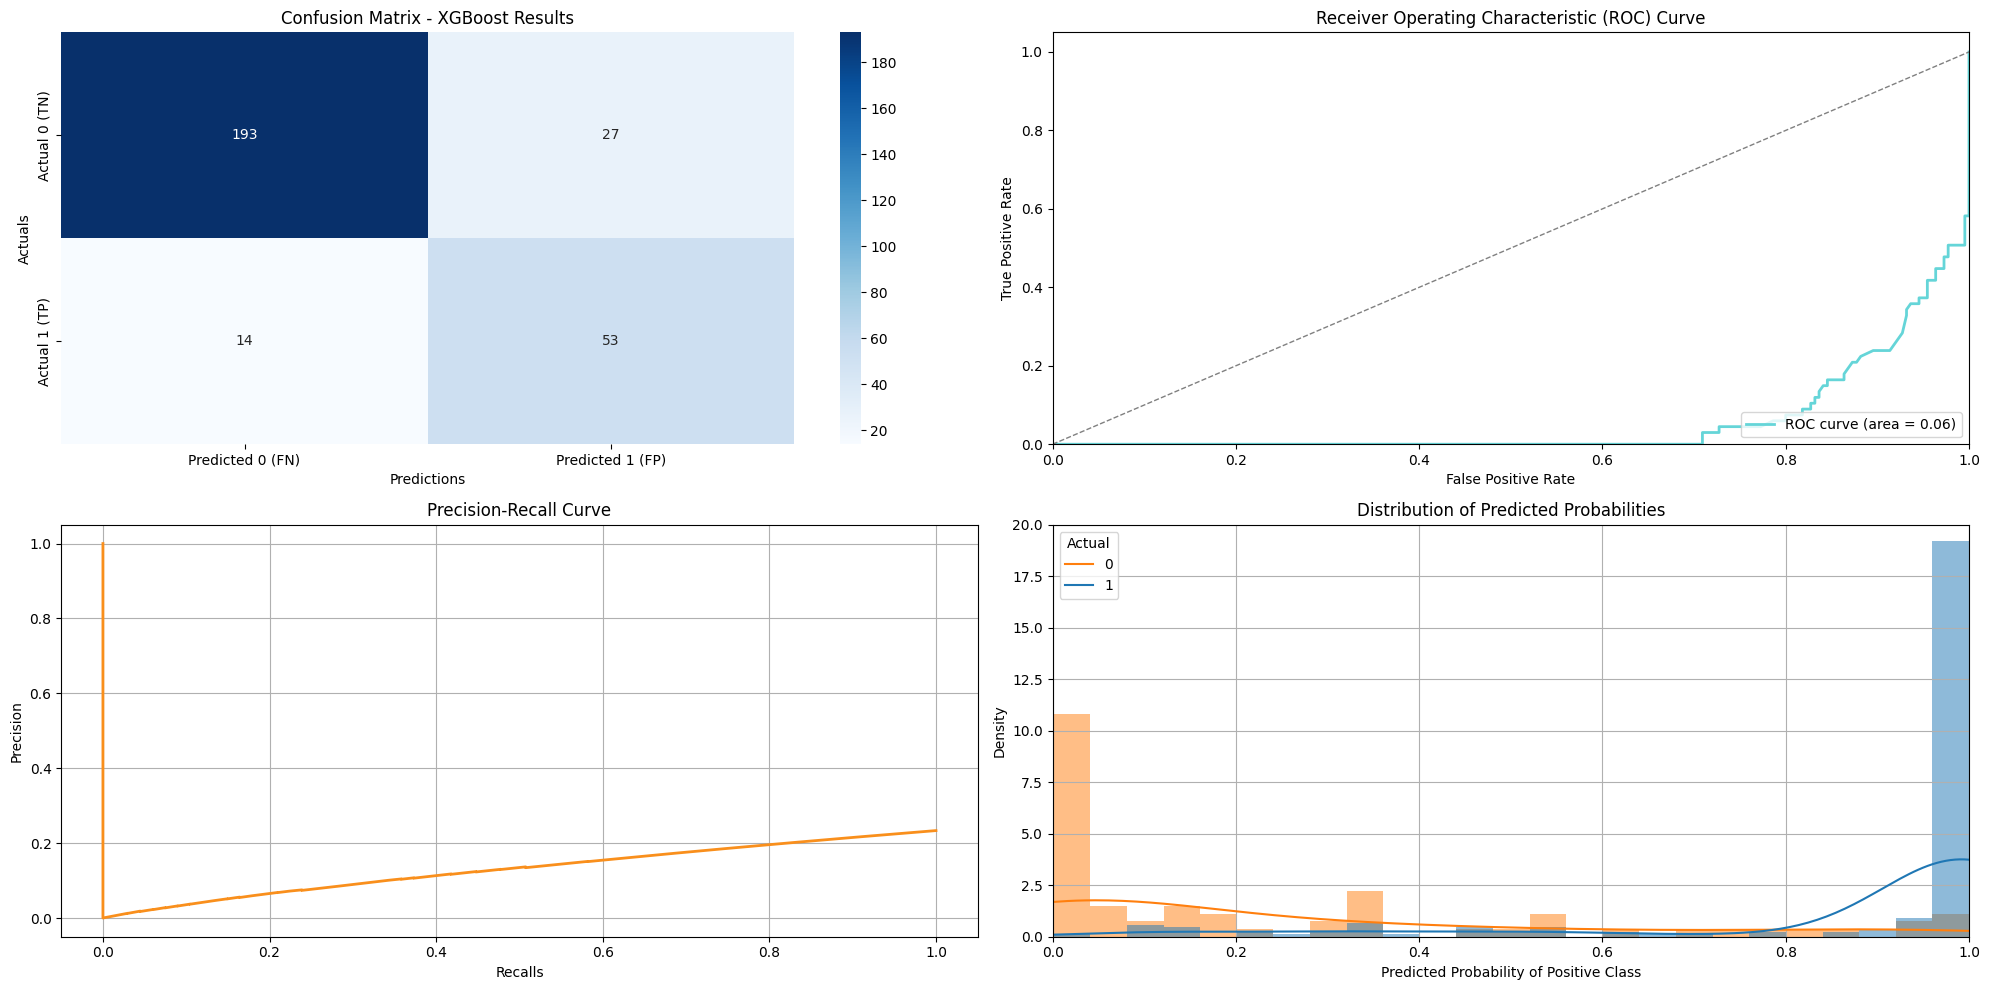

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

#------------------- SP1: Confusion Matrix

''' 
A confusion matrix is a table that summarizes the performance of a classification algorithm. 
It shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

Interpretation:

True Positives (TP): The number of instances correctly predicted as positive (1).
True Negatives (TN): The number of instances correctly predicted as negative (0).
False Positives (FP): The number of instances incorrectly predicted as positive (1) when they are actually negative (0).
False Negatives (FN): The number of instances incorrectly predicted as negative (0) when they are actually positive (1).
Metrics derived from the confusion matrix:

Accuracy: ((TP + TN) / (TP + TN + FP + FN))
Precision: (TP / (TP + FP)) (also known as Positive Predictive Value)
Recall (Sensitivity): (TP / (TP + FN)) (also known as True Positive Rate)
F1 Score: (2 \times (Precision \times Recall) / (Precision + Recall))

'''

G_cm = confusion_matrix(Y_test, Y_pred_xgb)
sns.heatmap(G_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0,0],
            xticklabels=['Predicted 0 (FP)', 'Predicted 1 (FN)'],
            yticklabels=['Actual 0 (TP)', 'Actual 1 (TN)'])
axs[0,0].set_title('Confusion Matrix - XGBoost Results')
axs[0,0].set_ylabel('Actuals')
axs[0,0].set_xlabel('Predictions')  

#------------------- SP2: ROC Curve

''' 
The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classifier's 
performance across different threshold settings. It plots the True Positive Rate (TPR) 
against the False Positive Rate (FPR).

Axes:

X-axis: False Positive Rate (FPR) = (FP / (FP + TN))
Y-axis: True Positive Rate (TPR) = (TP / (TP + FN))
Interpretation:

A point on the curve represents the TPR and FPR at a specific threshold.
The curve shows how the TPR increases as the FPR increases when you lower the threshold for classifying a positive instance.
Area Under the Curve (AUC): AUC ranges from 0 to 1. An AUC of 0.5 indicates no discrimination (random guessing), 
while an AUC of 1 indicates perfect discrimination. A higher AUC value indicates better model performance.

'''

fpr, tpr, _ = roc_curve(Y_test, positive_class_probabilities)
roc_auc = auc(fpr, tpr)
axs[0,1].plot(fpr, tpr, color='#65D5D8', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0,1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axs[0,1].set_xlim([0.0, 1.0])
axs[0,1].set_ylim([0.0, 1.05])
axs[0,1].set_xlabel('False Positive Rate')
axs[0,1].set_ylabel('True Positive Rate')
axs[0,1].set_title('Receiver Operating Characteristic (ROC) Curve')
axs[0,1].legend(loc='lower right')

#------------------- SP3: Precision-Recall Curve

''' 
The Precision-Recall curve is another way to evaluate the performance of a classifier, 
especially useful for imbalanced datasets. It plots Precision against Recall for different thresholds.

Axes:

X-axis: Recall (True Positive Rate)
Y-axis: Precision (Positive Predictive Value)
Interpretation:

A high precision indicates that a high proportion of positive identifications were actually correct.
A high recall indicates that a high proportion of actual positives were identified correctly.
The area under the Precision-Recall curve (AUC-PR) can also be used as a summary measure. 
A model with high precision and high recall will have a curve that is closer to the top right corner of the plot.
'''

precision, recall, _ = precision_recall_curve(Y_test, positive_class_probabilities)
axs[1,0].plot(recall, precision, color='#F98F1C', lw=2, label='Precision-Recall curve')
axs[1,0].set_xlabel('Recalls')
axs[1,0].set_ylabel('Precision')
axs[1,0].set_title('Precision-Recall Curve of XGBoost Results') 
axs[1,0].grid(True)

#------------------- SP4: Classification Report

''' 
This plot shows the distribution of predicted probabilities for the positive class (0) 
and the negative class (1). It helps visualize how well the model separates the two classes based on predicted probabilities.

Interpretation:

The x-axis represents the predicted probabilities of the positive class (0).
The y-axis represents the density or frequency of instances at each probability level.
Ideally, you want to see two distinct peaks: one for the negative class (1) and one for 
the positive class (0). If the distributions overlap significantly, it may indicate that the 
model is not effectively distinguishing between the two classes.
The area under the curve for each class can give you an idea of how well the model is performing. 
A clear separation between the two distributions suggests good model performance.

'''

sns.histplot(xg_df, x='Positive Class Probability', hue='Actual', bins=25, kde=True, 
             stat='density', common_norm=False, ax=axs[1, 1], edgecolor='none')
axs[1,1].set_title('Distribution of Predicted Probabilities')
axs[1,1].set_xlabel('Predicted Probability of Positive Class - XGBoost')
axs[1,1].set_ylabel('Density')

axs[1,1].set_xlim(0,1)
axs[1,1].set_ylim(0, 20)
axs[1,1].grid(True)
axs[1,1].legend(title='Actual', labels=['0','1'])

#--------------------------------------------------------------

plt.tight_layout()
plt.show()

In [ ]:
''' 
Generate new data rows and make predictions with an XGBoost model.

This script:
1. Calculates the number of new rows to add.
2. Generates random data for the new rows with the same number of features as the training data.
3. Creates a DataFrame for the new data.
4. Makes predictions and calculates the probabilities for the positive class using the XGBoost model.
5. Stores the results in a DataFrame with the row numbers, predicted values, positive class probabilities, and percentages.

Returns:
    pandas.DataFrame: A DataFrame containing the new row numbers, 
    predicted values, positive class probabilities, and percentages.

'''

num_new_rows = 300 - 287 #1 - hardoded lol, can still change depending on what u want
new_data = np.random.rand(num_new_rows, X_train.shape[1]) #2
new_df = pd.DataFrame(new_data, columns=X_train.columns) #3

new_predictions = xgb_model.predict(new_df) #4
new_predictions_proba = xgb_model.predict_proba(new_df)
new_positive_class_probabilities = new_predictions_proba[:, 0]

new_predictions_df = pd.DataFrame({ #5
    'Row': range(288, 301),  # rows 288 to 300; 13 new rows to predict from the actual 287 rows for tests.
    'Predicted': new_predictions,
    'Positive Class Probability': new_positive_class_probabilities,
    'Positive Class Prob-Percent': (new_positive_class_probabilities * 100).round(2)
})

new_predictions_df

,Row,Predicted,Positive Class Probability,Positive Class Prob-Percent
0,288,0,0.889246,88.919998
1,289,0,0.989332,98.930000
2,290,0,0.971793,97.180000
3,291,0,0.959131,95.910004
4,292,0,0.989332,98.930000
5,293,0,0.971793,97.180000
6,294,0,0.889246,88.919998
7,295,0,0.889246,88.919998
8,296,0,0.889246,88.919998
9,297,0,0.889246,88.919998


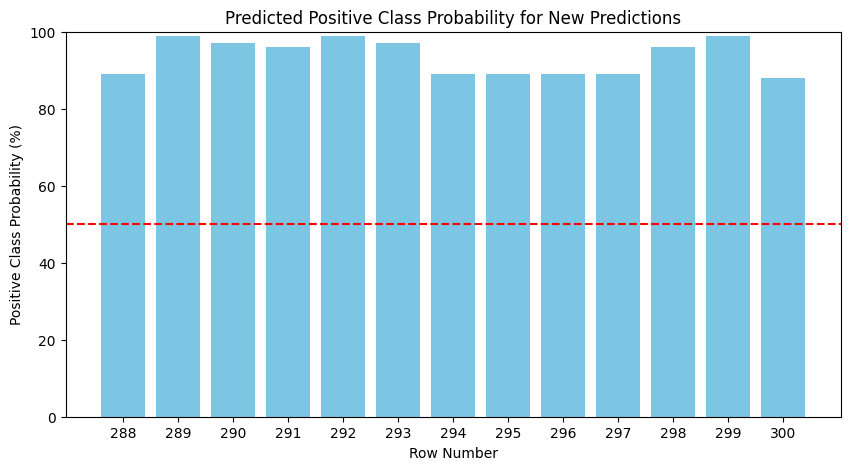

In [268]:
''' 
The height of each bar indicates how confident the model is about its prediction for that specific row. 
For example, if a bar reaches 80%, it means the model is 80% confident that the instance belongs to the positive class.
'''

plt.figure(figsize=(10, 5))
plt.bar(new_predictions_df['Row'], new_predictions_df['Positive Class Prob-Percent'], color='#44AED9', alpha=0.7)
plt.axhline(y=50, color='red', linestyle='--')
plt.title('Predicted Positive Class Probability for New Predictions')
plt.xlabel('Row Number')
plt.ylabel('Positive Class Probability (%)')
plt.xticks(new_predictions_df['Row'])
plt.ylim(0, 100)
plt.show()